<a href="https://colab.research.google.com/github/KhanSmiley/Data-Science/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
`df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [ ]:
### Problem Statement -> https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/data
### Dependent Variable : amount

In [ ]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df.shape

(50000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [ ]:
duplicate=df.duplicated()
print(duplicate.sum())

0


In [ ]:
df=df[df!=0].dropna()

In [ ]:
df.shape

(48838, 8)

In [ ]:
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'], format= "%Y-%m-%d %H:%M:%S UTC")

# 2009-06-15 17:26:21 UTC
# add time information
df['year'] = df.date_time_of_pickup.apply(lambda t: t.year)
df['month'] = df.date_time_of_pickup.apply(lambda t: t.month)
df['weekday'] = df.date_time_of_pickup.apply(lambda t: t.weekday())
df['hour'] = df.date_time_of_pickup.apply(lambda t: t.hour)

In [ ]:
df.dropna(inplace=True)

df.drop(df.index[(df.longitude_of_pickup < -75) |
           (df.longitude_of_pickup > -72) |
           (df.latitude_of_pickup < 40) |
           (df.latitude_of_pickup > 42)],inplace=True)
df.drop(df.index[(df.longitude_of_dropoff < -75) |
           (df.longitude_of_dropoff > -72) |
           (df.latitude_of_dropoff < 40) |
           (df.latitude_of_dropoff > 42)],inplace=True)


In [ ]:
df = df.drop(['unique_id', 'date_time_of_pickup'], axis=1)

In [ ]:
df.shape

(48791, 10)

In [ ]:
df.sample(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,year,month,weekday,hour
30605,4.5,-73.973044,40.792734,-73.971184,40.800789,1.0,2011,3,2,15
7934,4.1,-73.993575,40.757105,-74.001223,40.757015,5.0,2011,1,6,10
31999,20.9,-73.918698,40.767563,-73.965043,40.801054,1.0,2012,6,2,23
11582,6.0,-73.977727,40.752730,-73.988392,40.762615,1.0,2013,4,5,10
18702,29.3,-73.873025,40.774190,-73.947948,40.770645,1.0,2013,1,3,19
41684,4.9,-73.987728,40.721319,-73.988059,40.731068,1.0,2009,9,2,0
24601,4.1,-73.986708,40.761343,-73.986475,40.756558,5.0,2009,11,2,8
9781,4.9,-73.987620,40.752886,-73.975449,40.755021,1.0,2009,3,3,13
3213,5.0,-73.964067,40.770477,-73.956661,40.780793,1.0,2014,2,1,11
5901,8.5,-73.951702,40.777983,-73.967397,40.753422,5.0,2010,6,0,18


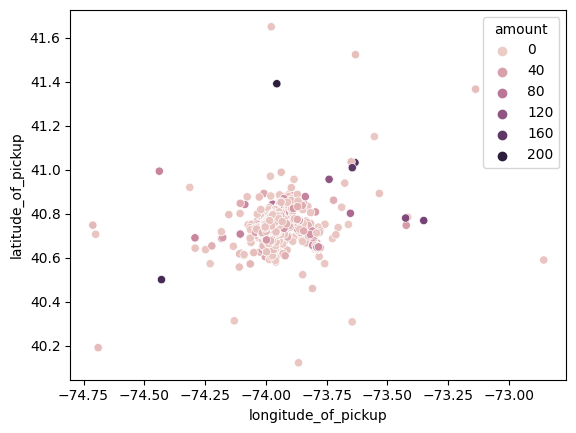

In [ ]:
sns.scatterplot(x='longitude_of_pickup', y= 'latitude_of_pickup', hue='amount',data=df)
plt.show()

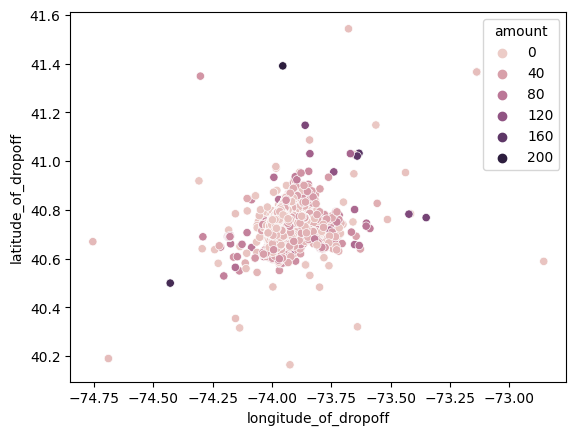

In [ ]:
sns.scatterplot(x='longitude_of_dropoff', y= 'latitude_of_dropoff',hue='amount',data=df)
plt.show()

<Axes: >

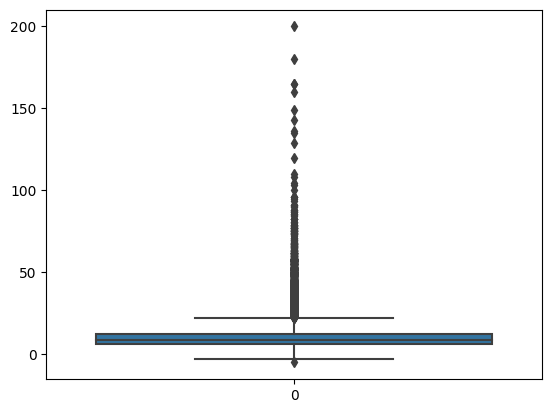

In [ ]:
sns.boxplot(df['amount'])

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-1.5*IQR
  upper_range=Q3+1.5*IQR
  return lower_range,upper_range

In [ ]:
low_amount,high_amount = remove_outlier(df["amount"])
df["amount"]=np.where(df["amount"]>high_amount,high_amount,df["amount"])
df["amount"]=np.where(df["amount"]<low_amount,low_amount,df["amount"])

<Axes: >

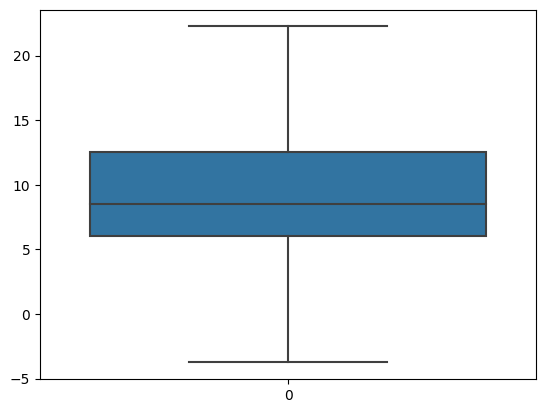

In [ ]:
sns.boxplot(df['amount'])

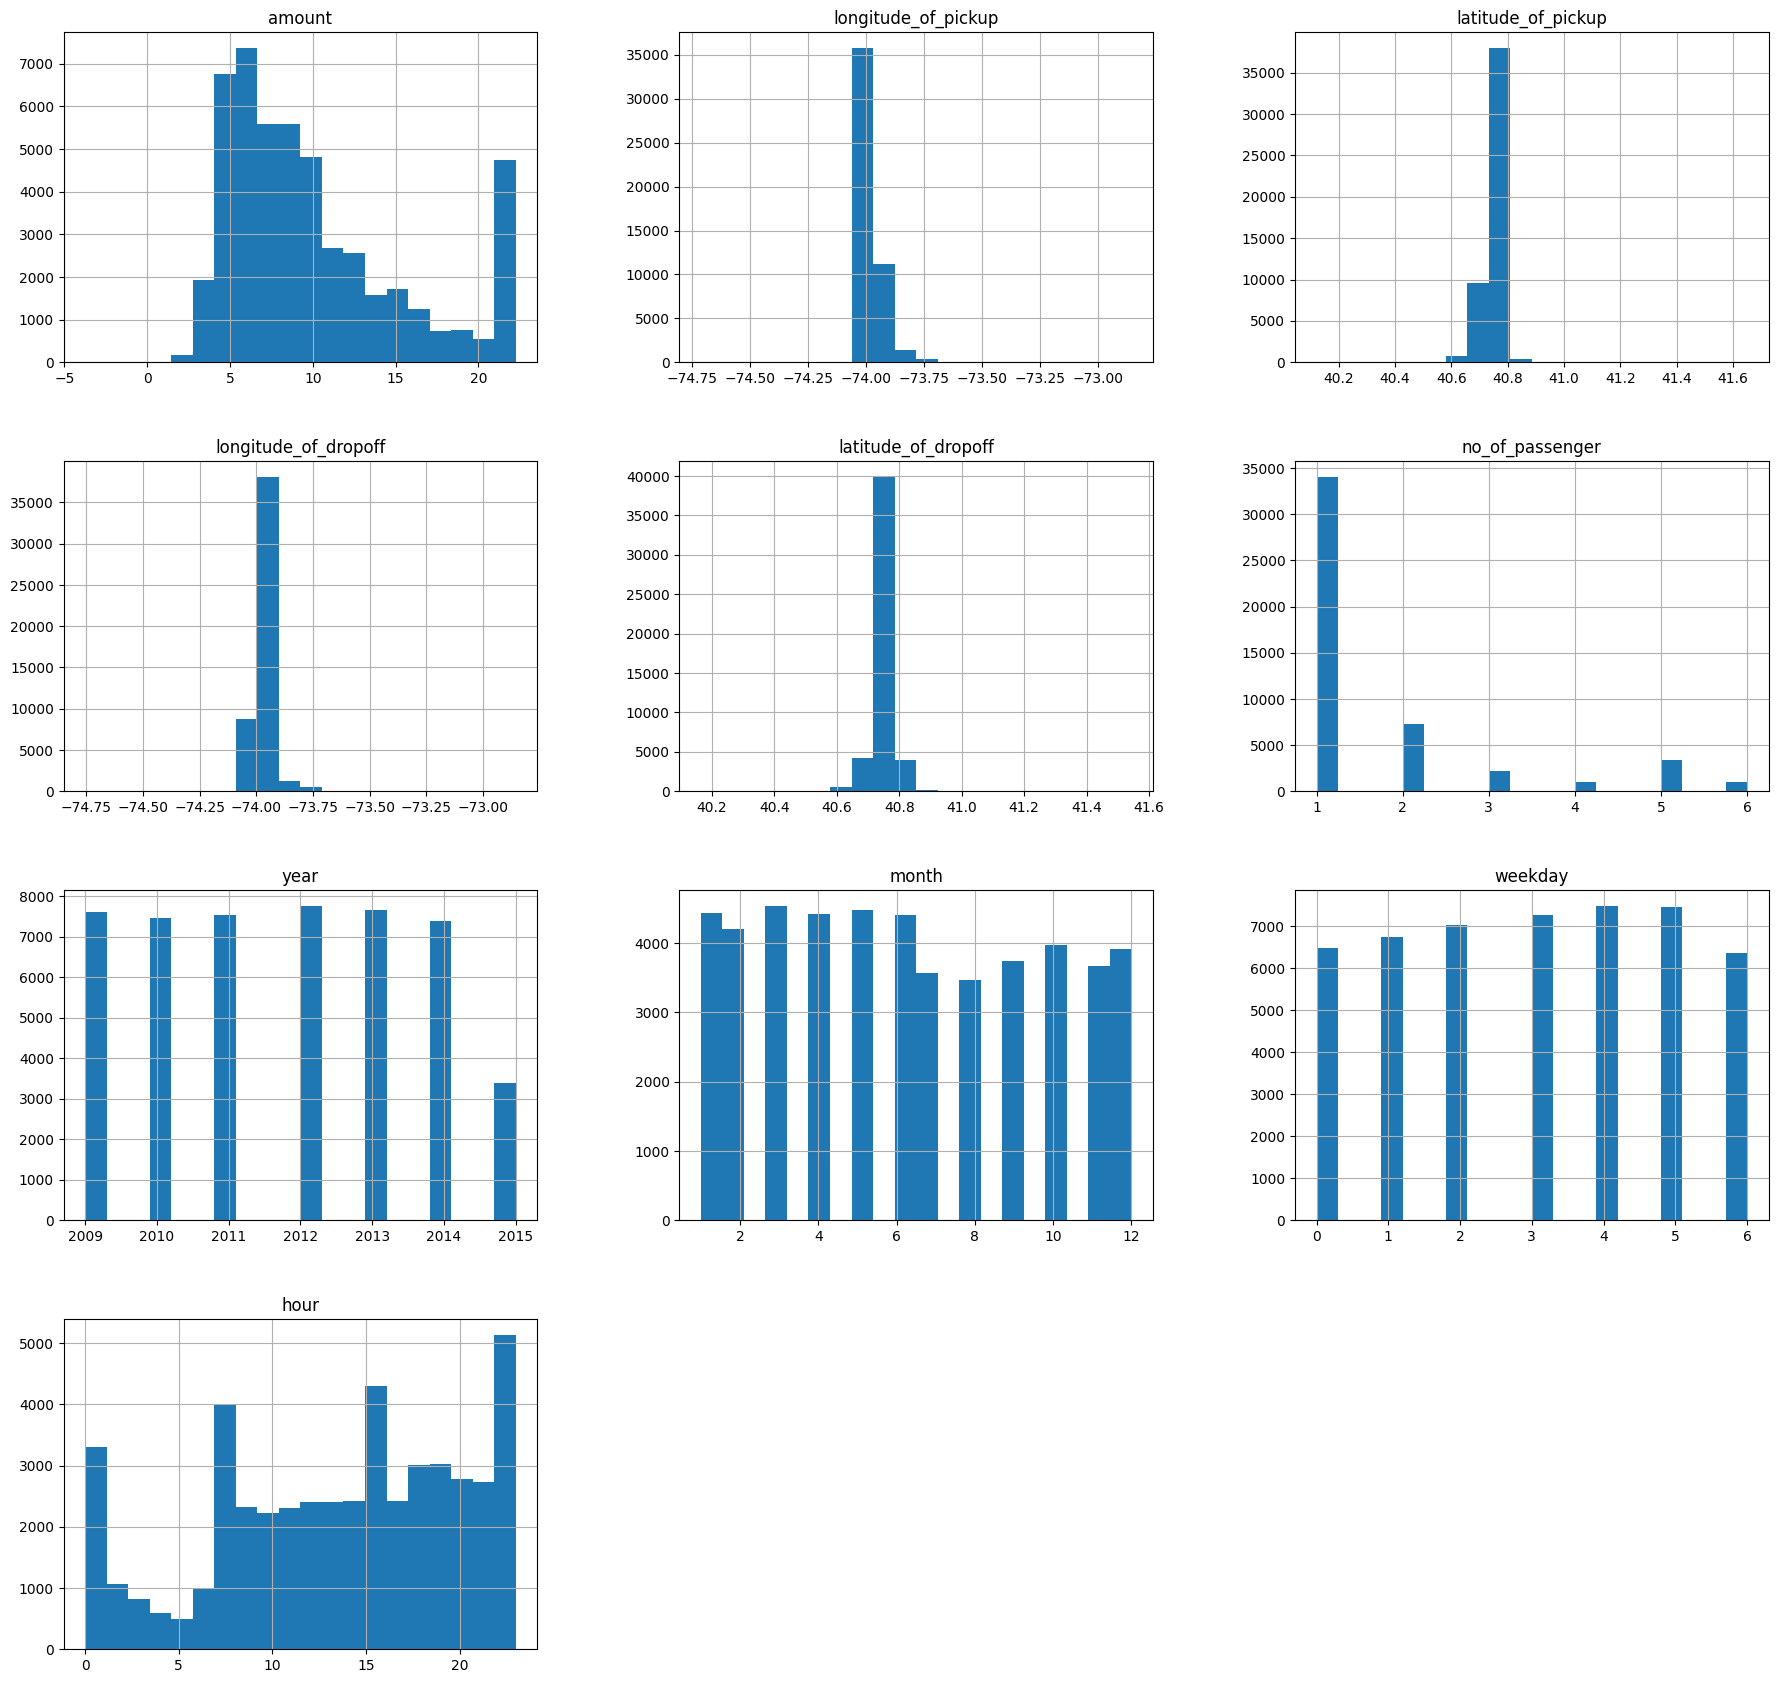

In [ ]:
df.hist(figsize=(22,21), bins=20);

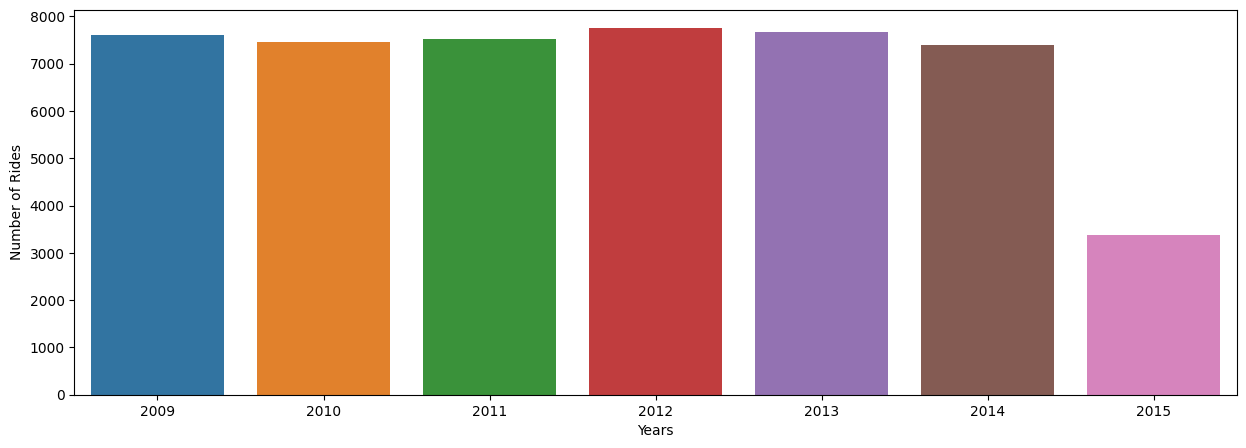

In [ ]:
year_insight=df.year.value_counts()
plt.figure(figsize=(15,5))
sns.barplot(data=df,x=year_insight.index,y=year_insight.values)
plt.ylabel("Number of Rides")
plt.xlabel("Years")
plt.show()

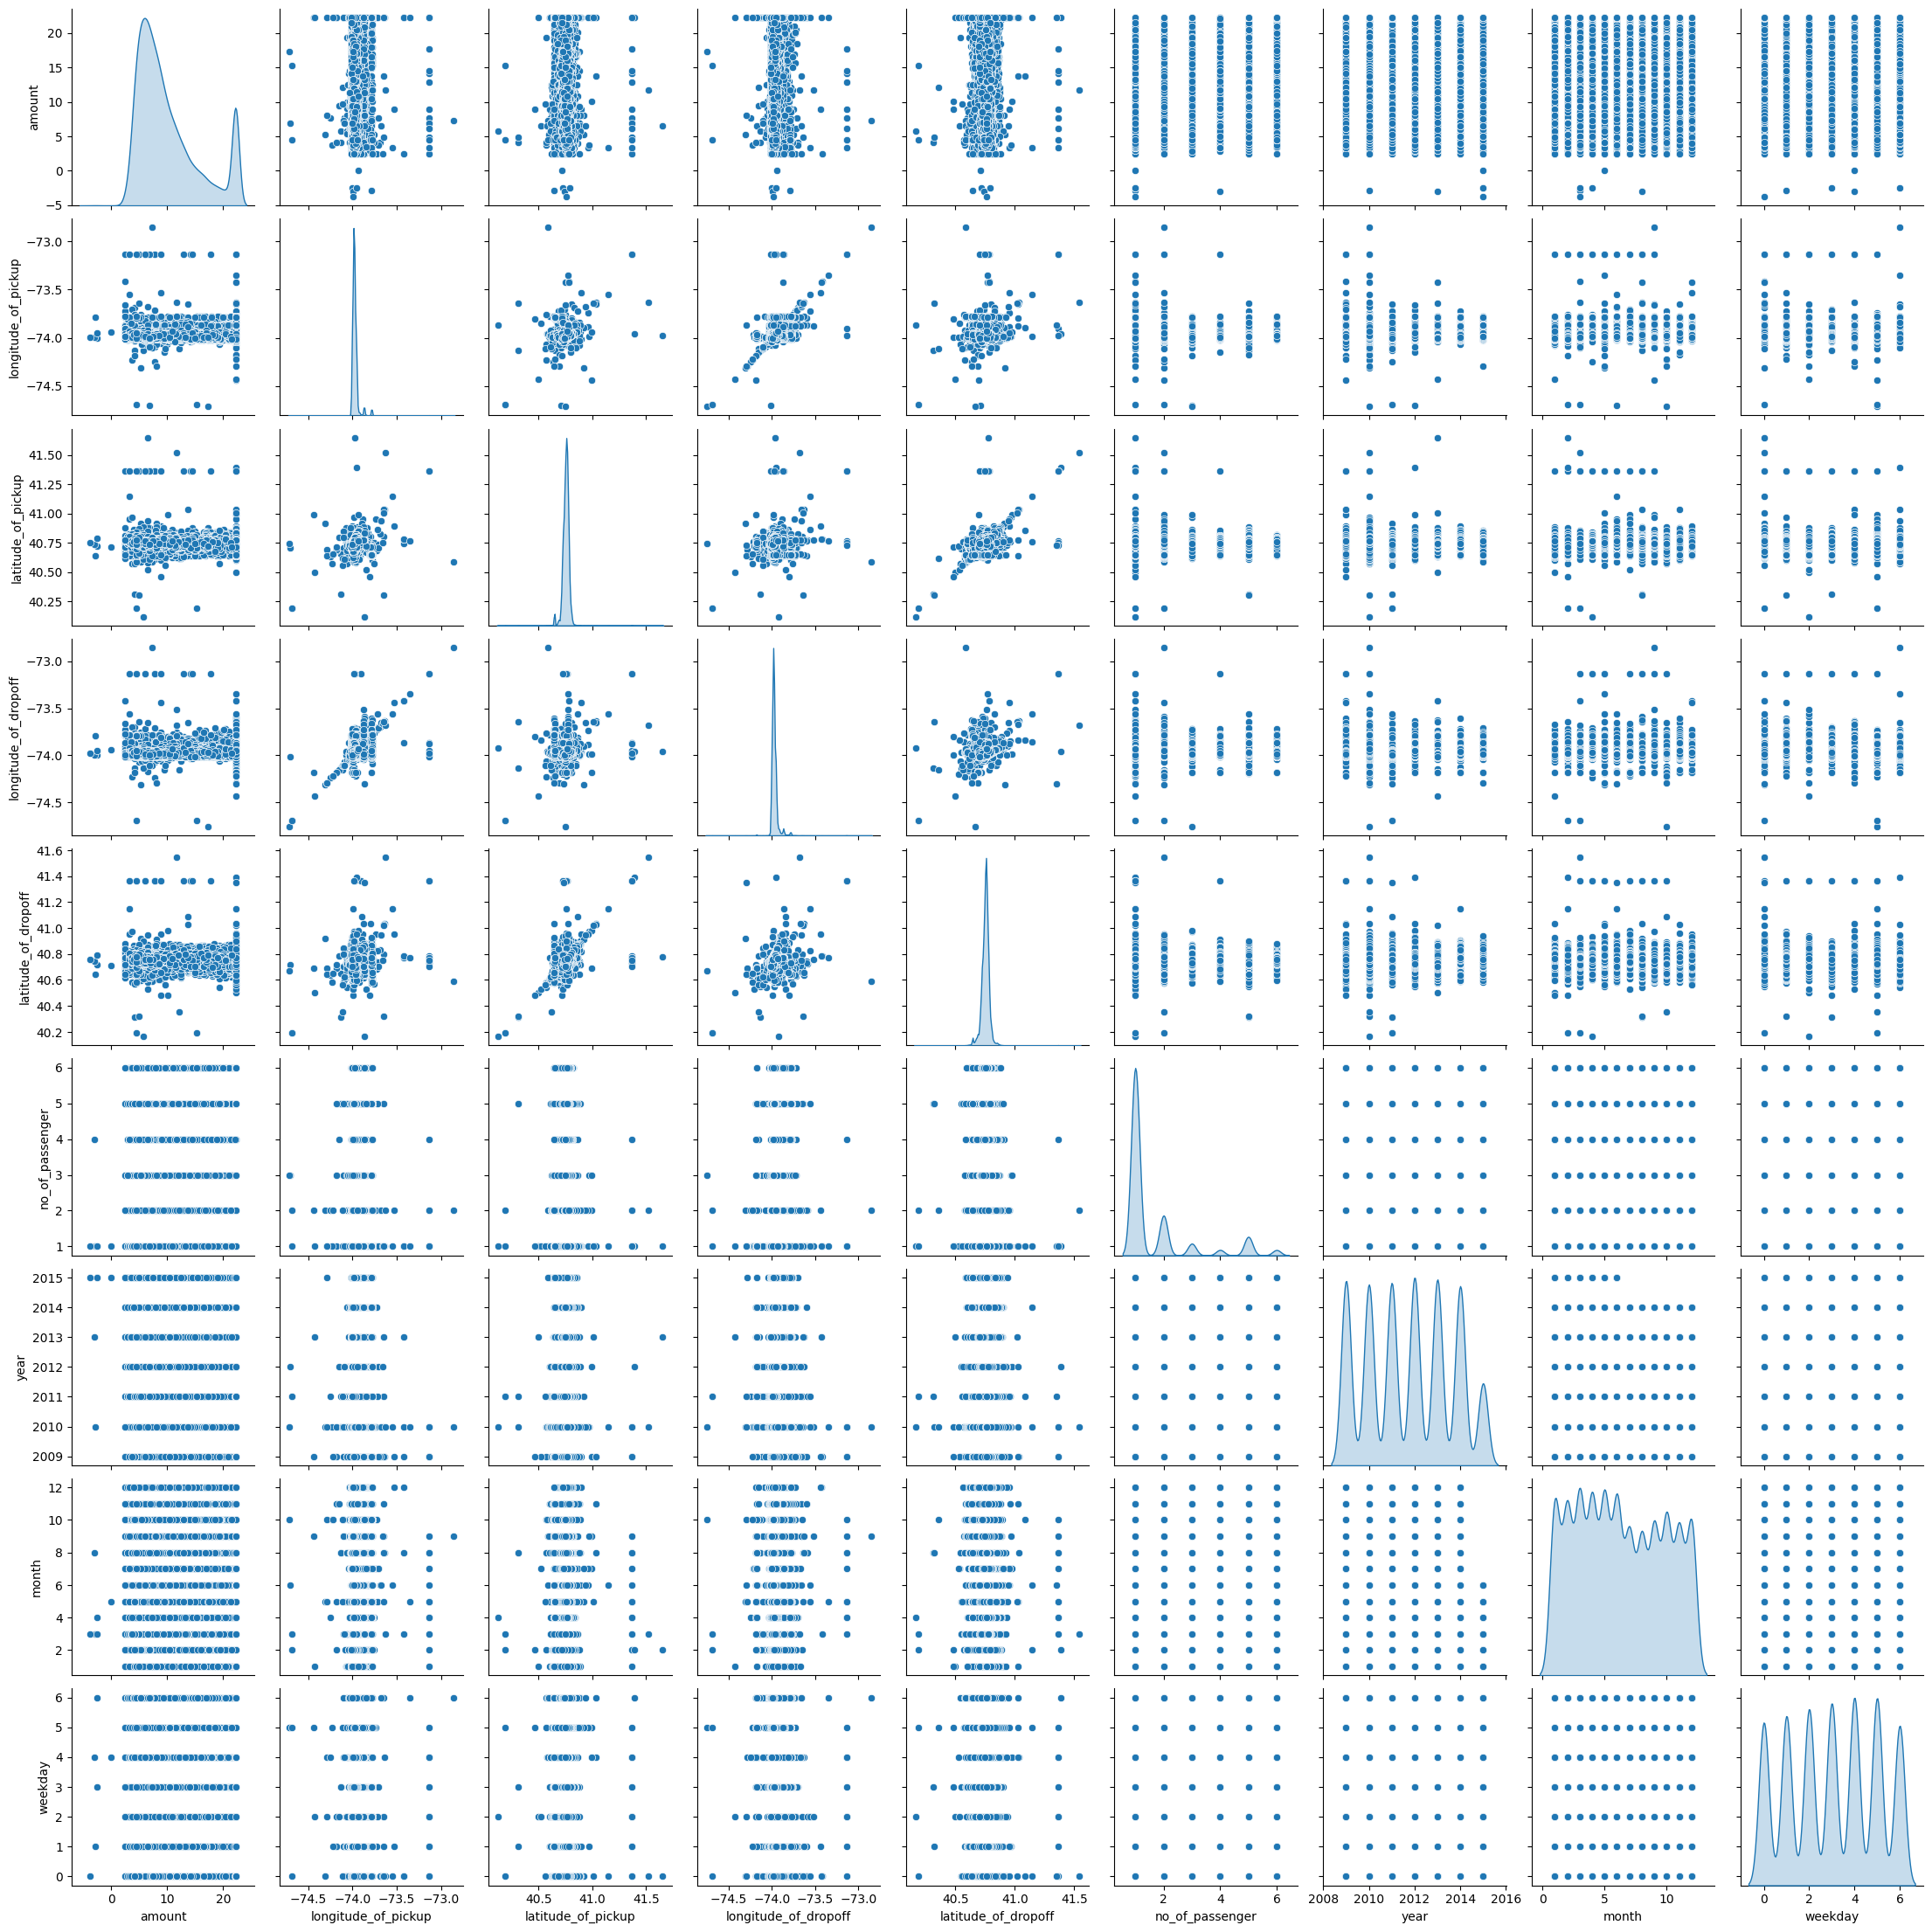

In [ ]:
amnt_df = df.iloc[:, 0:9]
sns.pairplot(amnt_df, diag_kind='kde')

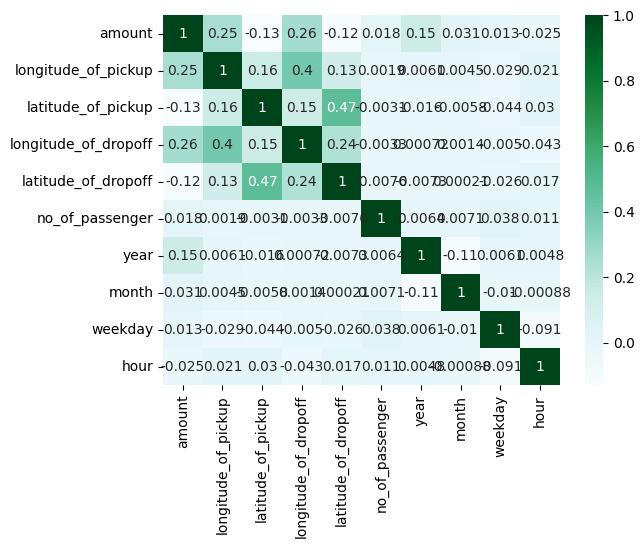

<Figure size 2000x1000 with 0 Axes>

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True, cmap='BuGn')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
x=df.drop(['amount'],axis=1)
y=df['amount']

In [ ]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 3.29253282, -0.96630412,  3.42707768, -1.17059546, -0.52358234,
        -1.46689309, -0.0800297 , -1.54880182,  0.54081709],
       [-1.0292452 , -1.29100756, -0.13629679,  0.90602701, -0.52358234,
        -0.93158134, -1.52462057, -1.03777148,  0.38707981],
       [-0.19099587,  0.32884633, -0.44625223, -0.03039791,  0.25232903,
        -0.39626959,  0.49780665, -0.0157108 , -2.0727168 ],
       [-0.30152097, -0.58298809, -0.45466509,  0.19386517, -0.52358234,
         0.13904216, -0.65786605,  1.00634989, -1.45776765],
       [ 0.17749663,  0.547282  ,  0.44905667,  0.95838484, -0.52358234,
        -0.93158134, -0.94678422, -1.03777148, -0.99655578]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.30,random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print(np.mean(cross_val_score(lr, x_train, y_train, cv=5)))
print(np.mean(cross_val_score(lr, x_test, y_test, cv=5)))

0.14278102539582307
0.1786428980711095


In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr, x_train, y_train, cv=5, return_estimator=True)
cv_results

{'fit_time': array([0.00807118, 0.00730872, 0.01110268, 0.01563478, 0.01656723]),
 'score_time': array([0.00102878, 0.00099254, 0.00204015, 0.00238967, 0.00214243]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_score': array([0.07467709, 0.16509626, 0.15720881, 0.17266117, 0.14426179])}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf=RandomForestRegressor(n_estimators=50,max_depth=10,min_samples_split=3)
model_rf.fit(x_train,y_train)
print("Train score:",model_rf.score(x_train,y_train))
print("Test Score:",model_rf.score(x_test,y_test))


Train score: 0.6811184458121394
Test Score: 0.6400656552048972


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model2=DecisionTreeRegressor(max_depth=10,criterion='absolute_error')
model2.fit(x_train,y_train)
print("Train score:",model2.score(x_train,y_train))
print("Test Score:",model2.score(x_test,y_test))

Train score: 0.5988281765247048
Test Score: 0.5353594891818125


In [ ]:
from sklearn.ensemble import BaggingRegressor
model_bag=BaggingRegressor(n_estimators=25)
model_bag.fit(x_train,y_train)
print(model_bag.score(x_train,y_train))
print(model_bag.score(x_test,y_test))

0.9640791305464853
0.7892203551657089


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_boost=AdaBoostRegressor(learning_rate=0.3,n_estimators=50)
model_boost.fit(x_train,y_train)
print(model_boost.score(x_train,y_train))
print(model_boost.score(x_test,y_test))

0.31191084483744247
0.3171415536977311


In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
d=y_test-y_pred
MSE = np.mean(d**2)
MAE=np.mean(abs(d))
RMSE=np.sqrt(MSE)
print("!!!!!!!!!RESULTS OF ERROR CALCULATIONS!!!!!!!!")
print("\nMEAN SQUARE ERROR: ",MSE)
print("\nMEAN ABSOLUTE ERROR: ",MAE)
print("\nROOT MEAN SQUARE ERROR: ",RMSE)

!!!!!!!!!RESULTS OF ERROR CALCULATIONS!!!!!!!!

MEAN SQUARE ERROR:  10.768820370960277

MEAN ABSOLUTE ERROR:  2.432394115044863

ROOT MEAN SQUARE ERROR:  3.2815880867287834
